# _1. DATA LOADING & PREPROCESSING_

# Data Loading

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/data.csv", sep=',(?=\S)', engine='python')
# \s - non white space character
# ',(?=\s)' - comma folowed by non white space character

# Data description

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              40000 non-null  object
 1   tags            40000 non-null  object
 2   followersCount  40000 non-null  int64 
 3   friendsCount    40000 non-null  int64 
 4   friends         40000 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
data.head()

,id,tags,followersCount,friendsCount,friends
0,"""1969527638""","[ ""#nationaldogday"" ]",319,112,"[ ""1969574754"", ""1969295556"", ""1969284056"", ""1..."
1,"""51878493""","[ ""#nationaldogday"" ]",275,115,"[ ""60789485"", ""2420931980"", ""2899776756"", ""127..."
2,"""1393409100""","[ ""#narcos"" ]",120,107,"[ ""86868062"", ""19697415"", ""2998836604"", ""45629..."
3,"""232891415""","[ ""#gloryoutnow"" ]",492,325,"[ ""361335082"", ""1405248468"", ""24626354"", ""7256..."
4,"""710130422907207680""","[ ""#nationaldogday"" ]",128,218,"[ ""1571896093"", ""768938323612008448"", ""2548665..."


In [ ]:
data.shape

(40000, 5)

# Drop null values

In [ ]:
data = data.dropna()
data.shape

(40000, 5)

# Drop rows with empty friends list

In [ ]:
data = data[data['friends'].apply(lambda x: x != "[]")]
data.shape

(39913, 5)

# Clean the hashtags

In [ ]:
data['tags'] = data['tags'].apply(lambda x: x[3:-3])
data.head()

,id,tags,followersCount,friendsCount,friends
0,"""1969527638""",#nationaldogday,319,112,"[ ""1969574754"", ""1969295556"", ""1969284056"", ""1..."
1,"""51878493""",#nationaldogday,275,115,"[ ""60789485"", ""2420931980"", ""2899776756"", ""127..."
2,"""1393409100""",#narcos,120,107,"[ ""86868062"", ""19697415"", ""2998836604"", ""45629..."
3,"""232891415""",#gloryoutnow,492,325,"[ ""361335082"", ""1405248468"", ""24626354"", ""7256..."
4,"""710130422907207680""",#nationaldogday,128,218,"[ ""1571896093"", ""768938323612008448"", ""2548665..."


# Convert the friends as a list for graph construction

In [ ]:
print(data.friends[0])
print(len(data.friends[0]))

[ "1969574754", "1969295556", "1969284056", "1969612214", "1970067476", "1969797386", "1969430539", "1969840064", "1969698176", "1970005154", "283011644", "1969901029", "1969563175", "1969302314", "1969978662", "1969457936", "1969667533", "1969547821", "1969943478", "1969668032", "283006529", "1969809440", "1969601096", "1969298856", "1969331652", "1969385498", "1969674368", "1969565263", "1970144676", "1969745390", "1969947438", "1969734134", "1969801326", "1969324008", "1969259820", "1969535827", "1970072989", "1969771688", "1969437804", "1969507394", "1969509972", "1969751588", "283012808", "1969302888", "1970224440", "1969603532", "283011244", "1969501046", "1969887518", "1970153138", "1970267527", "1969941955", "1969421654", "1970013110", "1969544905", "1969839590", "1969876500", "1969674625", "1969337952", "1970046536", "1970090934", "1969419133", "1969517215", "1969787869", "1969298065", "1970149771", "1969422638", "1969504268", "1970025554", "1969776001", "1970138611", "1969316

In [ ]:
import json

data['friends_list'] = data['friends'].apply(json.loads)
data['friends_count'] = data['friends_list'].apply(len)

data.head()

,id,tags,followersCount,friendsCount,friends,friends_list,friends_count
0,"""1969527638""",#nationaldogday,319,112,"[ ""1969574754"", ""1969295556"", ""1969284056"", ""1...","[1969574754, 1969295556, 1969284056, 196961221...",112
1,"""51878493""",#nationaldogday,275,115,"[ ""60789485"", ""2420931980"", ""2899776756"", ""127...","[60789485, 2420931980, 2899776756, 127410795, ...",115
2,"""1393409100""",#narcos,120,107,"[ ""86868062"", ""19697415"", ""2998836604"", ""45629...","[86868062, 19697415, 2998836604, 456295047, 74...",107
3,"""232891415""",#gloryoutnow,492,325,"[ ""361335082"", ""1405248468"", ""24626354"", ""7256...","[361335082, 1405248468, 24626354, 725675895965...",325
4,"""710130422907207680""",#nationaldogday,128,218,"[ ""1571896093"", ""768938323612008448"", ""2548665...","[1571896093, 768938323612008448, 2548665930, 3...",219


In [ ]:
print(type(data.friends_list[0][0]))

<class 'str'>


# Mismatched row removal

In [ ]:
mismatched_rows = data[data['friendsCount'] != data['friends_count']]
mismatched_rows

,id,tags,followersCount,friendsCount,friends,friends_list,friends_count
4,"""710130422907207680""",#nationaldogday,128,218,"[ ""1571896093"", ""768938323612008448"", ""2548665...","[1571896093, 768938323612008448, 2548665930, 3...",219
9,"""3167964531""",#nationaldogday,204,226,"[ ""386533263"", ""3306591866"", ""3270679956"", ""73...","[386533263, 3306591866, 3270679956, 7391488127...",221
28,"""4890830966""",#nationaldogday,140,134,"[ ""3318150356"", ""4196983835"", ""2148117930"", ""1...","[3318150356, 4196983835, 2148117930, 155442306...",133
37,"""262750792""",#nationaldogday,121,124,"[ ""768510763187179520"", ""20838795"", ""139261766...","[768510763187179520, 20838795, 1392617664, 298...",125
44,"""2949013004""",#respecttylerjoseph,464,158,"[ ""757302253657083904"", ""2391051348"", ""7690016...","[757302253657083904, 2391051348, 7690016483455...",160
...,...,...,...,...,...,...,...
39982,"""350966142""","#belgiangp"", ""#italiangp",934,451,"[ ""290673966"", ""89478035"", ""2388589245"", ""2945...","[290673966, 89478035, 2388589245, 2945975378, ...",453
39985,"""2509340357""",#nationaldogday,23898,9276,"[ ""3028530698"", ""24750409"", ""76853336542743756...","[3028530698, 24750409, 768533365427437568, 217...",9287
39989,"""4292997922""",#belgiangp,103,291,"[ ""320423269"", ""235607203"", ""382763253"", ""2899...","[320423269, 235607203, 382763253, 2899043793, ...",292
39995,"""2392502478""","#respecttylerjoseph"", ""#nationaldogday",13645,13624,"[ ""4430903653"", ""408582743"", ""968989339"", ""768...","[4430903653, 408582743, 968989339, 76875785456...",13634


In [ ]:
print(data.shape)
data = data[data['friendsCount'] == data['friends_count']]
print(data.shape)

(39913, 7)
(28453, 7)


In [ ]:
data = data.drop("friendsCount",axis=1)

In [ ]:
data.head()

,id,tags,followersCount,friends,friends_list,friends_count
0,"""1969527638""",#nationaldogday,319,"[ ""1969574754"", ""1969295556"", ""1969284056"", ""1...","[1969574754, 1969295556, 1969284056, 196961221...",112
1,"""51878493""",#nationaldogday,275,"[ ""60789485"", ""2420931980"", ""2899776756"", ""127...","[60789485, 2420931980, 2899776756, 127410795, ...",115
2,"""1393409100""",#narcos,120,"[ ""86868062"", ""19697415"", ""2998836604"", ""45629...","[86868062, 19697415, 2998836604, 456295047, 74...",107
3,"""232891415""",#gloryoutnow,492,"[ ""361335082"", ""1405248468"", ""24626354"", ""7256...","[361335082, 1405248468, 24626354, 725675895965...",325
5,"""3649469655""",#veranomtv2016,479,"[ ""2401096388"", ""707864762"", ""4096348512"", ""76...","[2401096388, 707864762, 4096348512, 7638558599...",131


# Removing ID's from friends list which is not in unique id column

In [ ]:
data.head(3)

,id,tags,followersCount,friends,friends_list,friends_count
0,"""1969527638""",#nationaldogday,319,"[ ""1969574754"", ""1969295556"", ""1969284056"", ""1...","[1969574754, 1969295556, 1969284056, 196961221...",112
1,"""51878493""",#nationaldogday,275,"[ ""60789485"", ""2420931980"", ""2899776756"", ""127...","[60789485, 2420931980, 2899776756, 127410795, ...",115
2,"""1393409100""",#narcos,120,"[ ""86868062"", ""19697415"", ""2998836604"", ""45629...","[86868062, 19697415, 2998836604, 456295047, 74...",107


In [ ]:
print(type(data.friends_list[0]))
print(type(data.friends_list[0][0]))
print(type(data.id[0]))

<class 'list'>
<class 'str'>
<class 'str'>


In [ ]:
data['id'] = data['id'].str.strip('"')

id_set = set(data['id'])

def filter_friends(friends_list):
    return [friend_id for friend_id in friends_list if friend_id in id_set]

data['friends_list_new'] = data['friends_list'].apply(filter_friends)
data.head()

,id,tags,followersCount,friends,friends_list,friends_count,friends_list_new
0,1969527638,#nationaldogday,319,"[ ""1969574754"", ""1969295556"", ""1969284056"", ""1...","[1969574754, 1969295556, 1969284056, 196961221...",112,[1969901029]
1,51878493,#nationaldogday,275,"[ ""60789485"", ""2420931980"", ""2899776756"", ""127...","[60789485, 2420931980, 2899776756, 127410795, ...",115,[]
2,1393409100,#narcos,120,"[ ""86868062"", ""19697415"", ""2998836604"", ""45629...","[86868062, 19697415, 2998836604, 456295047, 74...",107,[]
3,232891415,#gloryoutnow,492,"[ ""361335082"", ""1405248468"", ""24626354"", ""7256...","[361335082, 1405248468, 24626354, 725675895965...",325,[57795767]
5,3649469655,#veranomtv2016,479,"[ ""2401096388"", ""707864762"", ""4096348512"", ""76...","[2401096388, 707864762, 4096348512, 7638558599...",131,[]


In [ ]:
data.shape

(28453, 7)

In [ ]:
data = data[data['friends_list_new'].apply(lambda x: len(x) > 0)]
data.shape

(19862, 7)

In [ ]:
data = data.drop('friends', axis=1)
data = data.rename(columns={'friends_list_new': 'friends'})
data['friends_count'] = data['friends'].apply(len)
data = data.drop('friends_list', axis=1)

In [ ]:
data.head(500)

,id,tags,followersCount,friends_count,friends
0,1969527638,#nationaldogday,319,1,[1969901029]
3,232891415,#gloryoutnow,492,1,[57795767]
7,413415713,#narcos,582,1,[3345886792]
8,518053777,#nationaldogday,688,2,"[483375875, 313475995]"
11,3157134163,#justinssextapeleakedparty,138,1,[3437565839]
...,...,...,...,...,...
1095,730432345,#backtohogwarts,323,4,"[94039455, 476142289, 22852331, 26642006]"
1097,1881820574,#backtohogwarts,116,3,"[188899587, 125783095, 24911198]"
1098,2724508303,#getwellsoonjackson,198,3,"[21308602, 94039455, 2576354527]"
1100,16535264,#backtohogwarts,426,2,"[2942993494, 15023805]"


# Checking datatypes

In [ ]:
print(type(data.id[0]))
print(type(data.tags[0]))
print(type(data.followersCount[0]))
print(type(data.friends_count[0]))
print(type(data.friends[0]))
print(type(data.friends[0][0]))

<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'list'>
<class 'str'>


# Unique values

In [ ]:
print("id:", data["id"].nunique())
print("tags:", data["tags"].nunique())
print("followersCount:", data["followersCount"].nunique())
print("friends_count:", data["friends_count"].nunique())

# print("friends:", data["friends"].nunique())

id: 19862
tags: 225
followersCount: 3782
friends_count: 51


# Data visualization of hashtags

In [ ]:
tag_counts = data['tags'].value_counts()
top_tags = tag_counts.head(20)
top_tags

#nationaldogday                           15838
#respecttylerjoseph                        2111
#gloryoutnow                                319
#backtohogwarts                             144
#narcos                                     133
steve rogers                                 92
harry potter                                 52
#journalsstansparty                          51
labour                                       44
#belgiangp                                   41
bournemouth                                  36
#isac2016                                    34
#louisweloveyou                              33
#bundesliga                                  33
halsey                                       30
#nationaldogday", "#respecttylerjoseph       29
#whatsapp                                    29
cape canaveral                               28
#getwellsoonjackson                          27
britney                                      26
Name: tags, dtype: int64

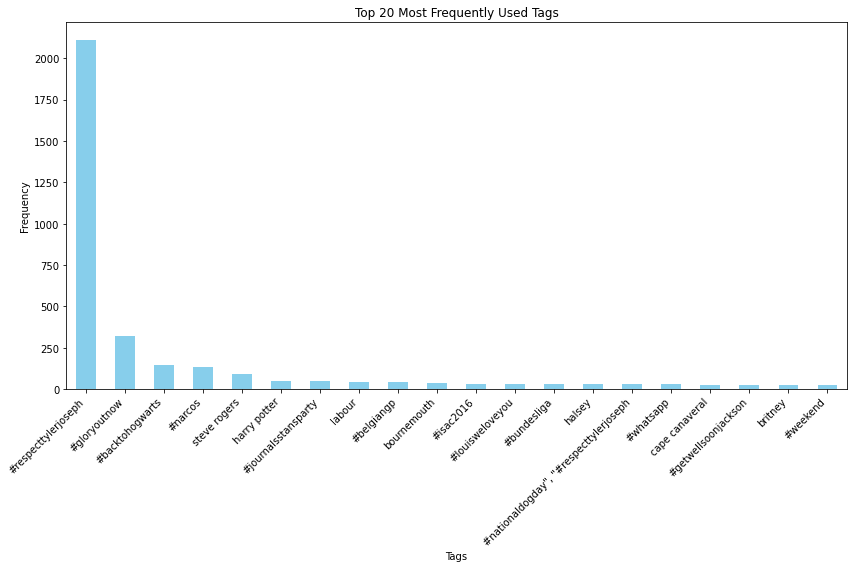

In [ ]:
import matplotlib.pyplot as plt

top_tags = tag_counts.iloc[1:21] # removing nationaldogday tag as it is very high frequent

plt.figure(figsize=(12, 8))
top_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequently Used Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save cleaned data

In [ ]:
print(data.shape)
data.to_csv(r"C:\Users\jyoth\Downloads\data_cleaned.csv", index=False)

(19862, 5)
